# Introduction

The purpose of this experiment is to determine what factors contribute


## The Dataset

https://data.world/datafiniti/electronic-products-and-pricing-data/workspace/file?filename=DatafinitiElectronicsProductsPricingData.csv

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings

%matplotlib inline

In [2]:
elect_retail_df = pd.read_csv('DatafinitiElectronicsProductsPricingData.csv')

In [3]:
elect_retail_df.info()
elect_retail_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7249 entries, 0 to 7248
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7249 non-null   object 
 1   prices.amountMax     7249 non-null   float64
 2   prices.amountMin     7249 non-null   float64
 3   prices.availability  7249 non-null   object 
 4   prices.condition     7249 non-null   object 
 5   prices.currency      7249 non-null   object 
 6   prices.dateSeen      7249 non-null   object 
 7   prices.isSale        7249 non-null   bool   
 8   prices.merchant      7249 non-null   object 
 9   prices.shipping      4277 non-null   object 
 10  prices.sourceURLs    7249 non-null   object 
 11  asins                7249 non-null   object 
 12  brand                7249 non-null   object 
 13  categories           7249 non-null   object 
 14  dateAdded            7249 non-null   object 
 15  dateUpdated          7249 non-null   o

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN


In [4]:
elect_retail_df.isna().sum()

id                        0
prices.amountMax          0
prices.amountMin          0
prices.availability       0
prices.condition          0
prices.currency           0
prices.dateSeen           0
prices.isSale             0
prices.merchant           0
prices.shipping        2972
prices.sourceURLs         0
asins                     0
brand                     0
categories                0
dateAdded                 0
dateUpdated               0
ean                    5706
imageURLs                 0
keys                      0
manufacturer           4014
manufacturerNumber        0
name                      0
primaryCategories         0
sourceURLs                0
upc                       0
weight                    0
Unnamed: 26            7210
Unnamed: 27            7231
Unnamed: 28            7243
Unnamed: 29            7237
Unnamed: 30            7243
dtype: int64

In [5]:
elect_retail_df.isna().sum() / len(elect_retail_df)

id                     0.000000
prices.amountMax       0.000000
prices.amountMin       0.000000
prices.availability    0.000000
prices.condition       0.000000
prices.currency        0.000000
prices.dateSeen        0.000000
prices.isSale          0.000000
prices.merchant        0.000000
prices.shipping        0.409988
prices.sourceURLs      0.000000
asins                  0.000000
brand                  0.000000
categories             0.000000
dateAdded              0.000000
dateUpdated            0.000000
ean                    0.787143
imageURLs              0.000000
keys                   0.000000
manufacturer           0.553732
manufacturerNumber     0.000000
name                   0.000000
primaryCategories      0.000000
sourceURLs             0.000000
upc                    0.000000
weight                 0.000000
Unnamed: 26            0.994620
Unnamed: 27            0.997517
Unnamed: 28            0.999172
Unnamed: 29            0.998345
Unnamed: 30            0.999172
dtype: f

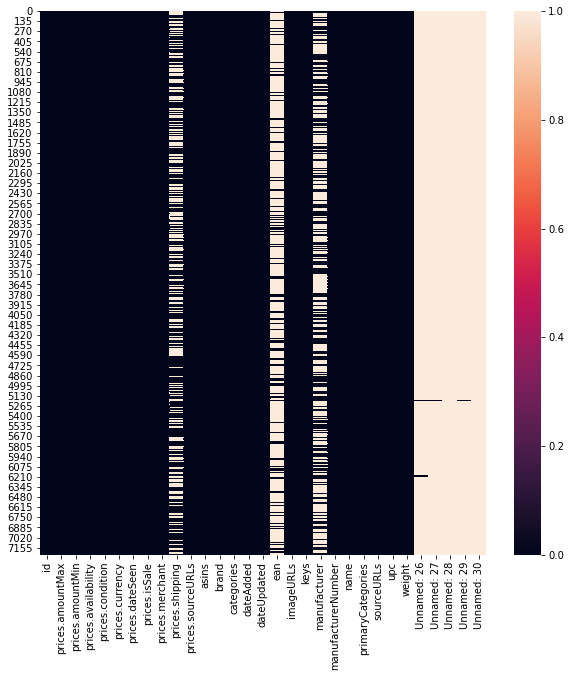

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(elect_retail_df.isna())
plt.show()

In [7]:
elect_retail_df.drop(columns=['id','Unnamed: 26', 'Unnamed: 27','Unnamed: 28', 
                              'Unnamed: 29', 'Unnamed: 30', ], inplace=True)

In [8]:
elect_retail_df.head()
    

,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,prices.sourceURLs,...,ean,imageURLs,keys,manufacturer,manufacturerNumber,name,primaryCategories,sourceURLs,upc,weight
0,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,http://www.bestbuy.com/site/sanus-tv-wall-moun...,...,NaN,https://images-na.ssl-images-amazon.com/images...,sanusvlf410b110inchsuperslimfullmotionmountfor...,NaN,VLF410B1,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds
1,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,https://www.walmart.com/ip/BOYTONE-BT210FB-BLA...,...,NaN,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds
2,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,...,NaN,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds
3,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,https://www.bestbuy.com/site/boytone-2500w-2-1...,...,NaN,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds
4,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,https://www.bestbuy.com/site/boytone-2500w-2-1...,...,NaN,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds
